In [40]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
seednumber = rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [41]:
import pandas as pd

datapath = "/Users/tuanle/DynamicPricing/Data/"

# Ha_Noi = pd.read_csv(datapath+"HaNoi_1week_LWT.csv")
# Ha_Noi.accept_rate = Ha_Noi.accept_rate.shift(-1)
# Ha_Noi = Ha_Noi.drop("request", axis = 1)
# df = pd.DataFrame(Ha_Noi)

Ha_Noi2 = pd.read_csv(datapath+"HaNoi_1monthLWT_VariedThreshold.csv")
Ha_Noi2.accept_rate = Ha_Noi2.accept_rate.shift(-1)
Ha_Noi2 = Ha_Noi2.dropna(subset =["longwait_percent300", "accept_rate"])
# median = Ha_Noi2["longwait_percent300"].median()
# Ha_Noi2.fillna(median, inplace = True)
df2 = pd.DataFrame(Ha_Noi2)

# threshold for request
# df2 = df2.drop(df2[(df2.request < 15)].index)
#Dong_Da.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ad44e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d41d358>]], dtype=object)

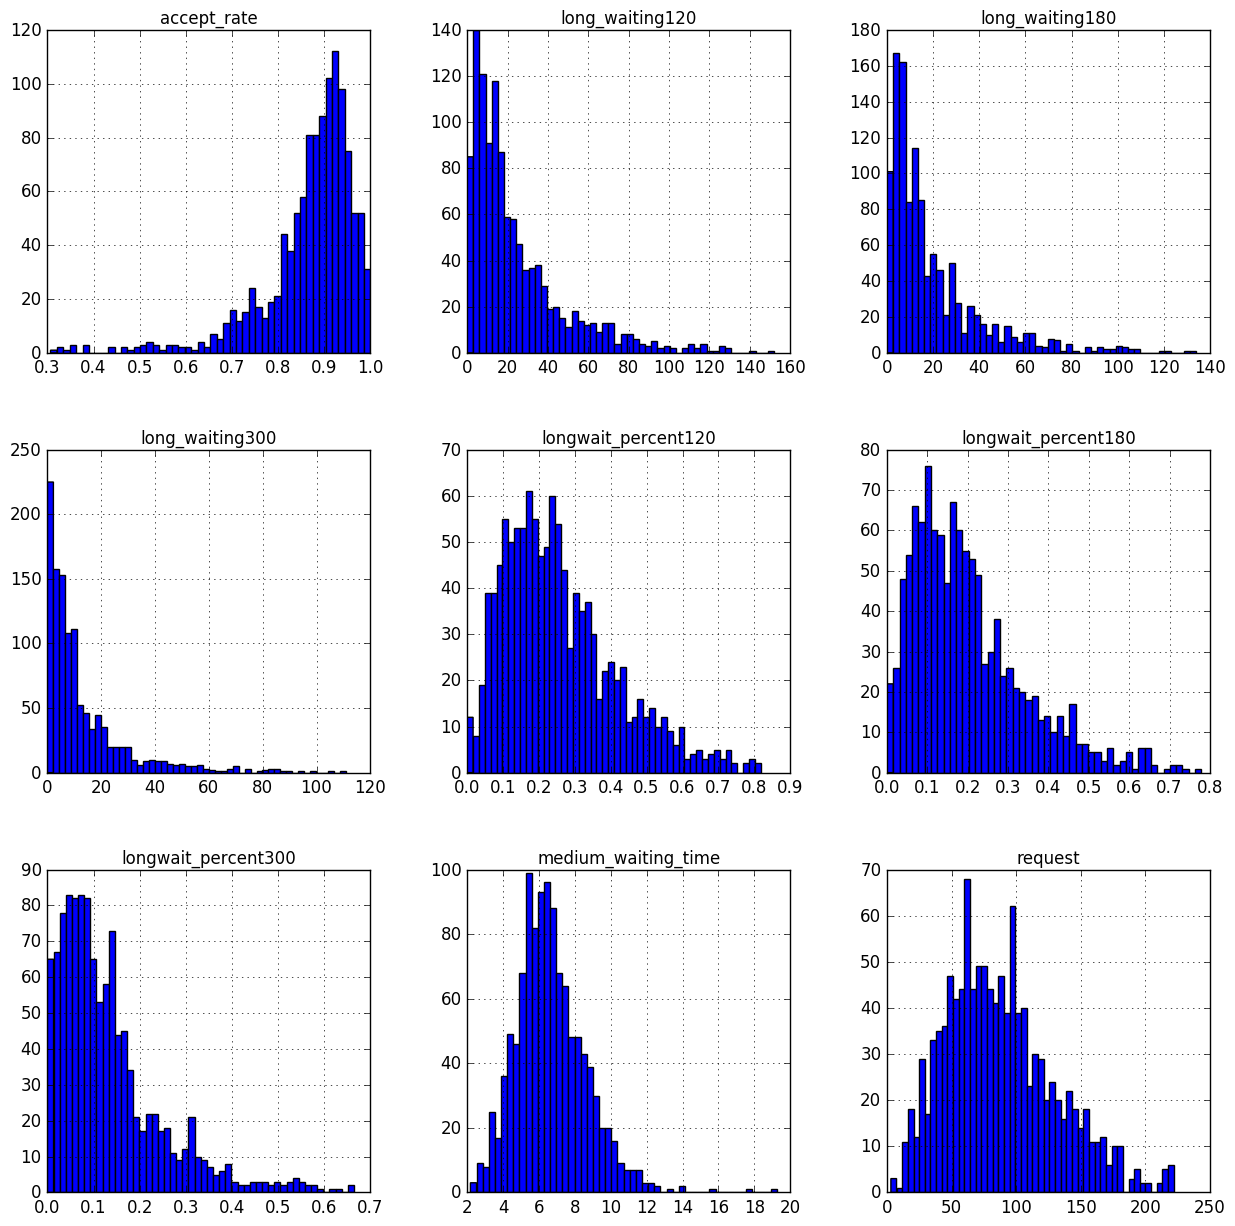

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
df2.hist(bins = 50, figsize = (15, 15))

# Train and Test sets between longwait_percent300 and AR (test size = 10% sample size)

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Ha_Noi2, test_size=0.1)
Xtrain = train_set['longwait_percent300'].reshape(-1,1)
Xtrain3 = train_set['long_waiting300'].reshape(-1,1)

#Generate test sets for two variables: long_waitingtime and long_waitingtime_percent300
Xtest3 = test_set['long_waiting300'].reshape(-1,1)
Xtest = test_set['longwait_percent300'].reshape(-1,1)


Ytest = test_set['accept_rate'].reshape(-1,1)
Ytrain = train_set['accept_rate'].reshape(-1,1)




# Train and Test sets between longwait_percent300 and AR (test size increases)

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_set2, test_set2 = train_test_split(Ha_Noi2, test_size=0.3)
Xtrain2 = train_set2['longwait_percent300'].reshape(-1,1)
Ytrain2 = train_set2['accept_rate'].reshape(-1,1)

Xtest2 = test_set2['longwait_percent300'].reshape(-1,1)
Ytest2 = test_set2['accept_rate'].reshape(-1,1)



# Linear Regression - ML model

In [49]:
from sklearn.linear_model import LinearRegression

#Fit the Lin-Reg model for the 1st train-test set
model = LinearRegression()
result = model.fit(Xtrain, Ytrain)
model.coef_, model.intercept_
print("Equation is: X*(%.3f) + %.3f" % (model.coef_, model.intercept_))

#Fit the Lin-Reg model for the 2nd train-test set
model2 = LinearRegression()
result = model2.fit(Xtrain2, Ytrain)

#Fit the Lin-Reg model for the 3rd train-test set
model3 = LinearRegression()
result = model3.fit(Xtrain3, Ytrain)


Equation is: X*(-0.679) + 0.957


# Predict the values of acceptance rate using the test set

In [50]:
Accept_rate_prediction = model.predict(Xtest)
Accept_rate_train  = model.predict(Xtrain)

Accept_rate_prediction2 = model2.predict(Xtest2)
Accept_rate_train2 = model2.predict(Xtrain2)


Accept_rate_prediction3 = model.predict(Xtest3)
Accept_rate_train3  = model.predict(Xtrain3)





Saving figure longwait_percent vs_acceptance_rate


(None,)

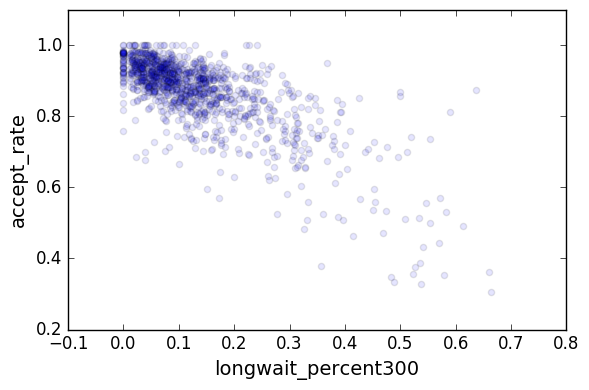

In [29]:
Ha_Noi2.plot(kind="scatter", x="longwait_percent300", y="accept_rate", alpha=0.1),
save_fig("longwait_percent vs_acceptance_rate"),
# foo.plot(kind="scatter", x="average_waiting_time", y="accept_rate", alpha=0.1)


# Mean Squared Error & Mean Absolute Error of Linear Regression

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_mse = mean_squared_error(Ytest, Accept_rate_prediction)
lin_rmse = np.sqrt(lin_mse) #taking square root of MSE converts the units back to the original units of the output variable

lin_mae = mean_absolute_error(Ytest, Accept_rate_prediction)
print("Mean Square Error`:\t",lin_rmse)
print("Mean Absolute Error:\t", lin_mae)


r_squared = r2_score(Ytest2, Accept_rate_prediction2) #built-in formula for R^2 
print("R^2:\t", r_squared) 

adjusted_Rsquared = 1 - (1-r_squared)*(len(Xtest)-1)/(len(Xtest)-1-1) #formula for adjusted R^2 by theory
print("Adjusted R^2:\t", adjusted_Rsquared) #correct the error when adding more and more independent variables to the linear regression model

lin_mse = mean_squared_error(Ytrain, Accept_rate_train)
lin_rmse = np.sqrt(lin_mse)
print("Mean Squred Error_train:\t", lin_rmse)


Mean Square Error`:	 0.0650719834671
Mean Absolute Error:	 0.0488082540751
R^2:	 0.538354327594
Adjusted R^2:	 0.534340017399
Mean Squred Error_train:	 0.069792877179


In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_mse2 = mean_squared_error(Ytest, Accept_rate_prediction3)
lin_rmse2 = np.sqrt(lin_mse2) #taking square root of MSE converts the units back to the original units of the output variable

lin_mae2 = mean_absolute_error(Ytest, Accept_rate_prediction3)
print("Mean Square Error:\t",lin_rmse2)
print("Mean Absolute Error:\t", lin_mae2)


r_squared2 = r2_score(Ytest, Accept_rate_prediction3) #built-in formula for R^2 
print("R^2:\t", r_squared2) 

adjusted_Rsquared2 = 1 - (1-r_squared2)*(len(Xtest2)-1)/(len(Xtest2)-1-1) #formula for adjusted R^2 by theory
print("Adjusted R^2:\t", adjusted_Rsquared2) #correct the error when adding more and more independent variables to the linear regression model

lin_mse2 = mean_squared_error(Ytrain, Accept_rate_train3)
lin_rmse2 = np.sqrt(lin_mse2)
print("Mean Squred Error_train:\t", lin_rmse2)

Mean Square Error:	 16.9064656111
Mean Absolute Error:	 10.0500456882
R^2:	 -22725.1342624
Adjusted R^2:	 -22790.2521256
Mean Squred Error_train:	 13.7079087731


Comment: R^2 and Adjusted R^2 are nearly the same (0.419 vs 0.417). This explains the acceptance rate is only explained roughly 50% by the independent variable average waiting time

# Measure Correlation Coefficients between acceptance rate against other variables

In [204]:
corr_matrix = Ha_Noi2.corr()
# corr_matrix2 = foo.corr()
corr_matrix["accept_rate"].sort_values(ascending=False) #, corr_matrix2["accept_rate"].sort_values(ascending=False))




accept_rate            1.000000
request               -0.215208
medium_waiting_time   -0.500025
long_waiting120       -0.572692
long_waiting180       -0.601540
long_waiting300       -0.626660
longwait_percent120   -0.728377
longwait_percent180   -0.742063
longwait_percent300   -0.744161
Name: accept_rate, dtype: float64

# Save the model into disk and load it with given test set (Xtest, Ytest)

In [10]:
from sklearn.externals import joblib
filename = 'my_model.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xtest, Ytest) #R^2 result
print(result)


0.605328511812


# Random Forest Algorithm and Model Evaluations using Cross-Validation

In [190]:
import numpy as np
from sklearn.preprocessing import LabelEncoder  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


forest_reg = RandomForestRegressor()
forest_reg.fit(Xtrain, Ytrain.ravel())
Accept_rate_prediction3 = forest_reg.predict(Xtest)

lin_reg = LinearRegression()


lin_mse = mean_squared_error(Ytest, Accept_rate_prediction3)
forest_rmse = np.sqrt(lin_mse)
print("Root Mean Square Error of RF Algo:\t",forest_rmse)

lin_mse2 = mean_squared_error(Ytest, Accept_rate_prediction)
lin_rmse = np.sqrt(lin_mse2)
print("Root Mean Square Error of Lin-reg Algo:\t", lin_rmse)

#Evaluate RF algo on the whole training set by cross-validation
scores = cross_val_score(forest_reg, Xtrain, Ytrain.ravel(), scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-scores)

#Evaluate RF algo on the whole test set by cross-validation
scores3 = cross_val_score(forest_reg, Xtest, Ytest.ravel(), scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores3 = np.sqrt(-scores3)

#Evaluate Lin-Reg algo on the whole training set by cross-validation with k = 50 folds
scores2 = cross_val_score(lin_reg, Xtrain, Ytrain.ravel(), scoring = "neg_mean_squared_error", cv = 100)
linreg_rmse_scores2 = np.sqrt(-scores2)

#Evaluate Lin-Reg algo on the test set by cross-validation
scores4 = cross_val_score(lin_reg, Xtest, Ytest.ravel(), scoring = "neg_mean_squared_error", cv = 100)
linreg_rmse_scores4 = np.sqrt(-scores4)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard", scores.std())
    print("Max:", scores.max())
    print("Min:", scores.min())

display_scores(linreg_rmse_scores2)
display_scores(linreg_rmse_scores4)
lin_mae = mean_absolute_error(Ytest, Accept_rate_prediction)

# display_scores(Accept_rate_prediction)
# print("Mean Square Error:\t", linreg_rmse_scores2)
# print("Mean Absolute Error:\t", lin_mae)

Root Mean Square Error of RF Algo:	 0.0818206163886
Root Mean Square Error of Lin-reg Algo:	 0.0731282818904
Scores: [ 0.0448055   0.04212294  0.04002274  0.08571578  0.05645007  0.08970289
  0.09525604  0.06628221  0.03821038  0.07496271  0.08402273  0.03979099
  0.05175089  0.11436703  0.05735022  0.09779323  0.07452983  0.05185164
  0.06637691  0.05328309  0.06954375  0.09403732  0.05751731  0.04741559
  0.05376367  0.05400049  0.06349508  0.07240515  0.0722232   0.08490888
  0.07727498  0.05292307  0.0581471   0.09031724  0.08765635  0.08677042
  0.0803811   0.07975564  0.10004776  0.04119873  0.11766501  0.04554458
  0.05923274  0.06021432  0.07748993  0.05963338  0.08136216  0.05100944
  0.05273393  0.08199442  0.07441987  0.07774396  0.07285644  0.05657684
  0.06251673  0.07194894  0.04298079  0.08746875  0.0502728   0.11560344
  0.04401981  0.03901347  0.08505057  0.04877118  0.04188375  0.07208111
  0.08120635  0.05840802  0.07654726  0.0638207   0.07475782  0.11964692
  0.054

0.663327218813
